# ASSIGNMENT-6  MULTI-LINEAR REGRESSION


In [63]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


In [64]:
#read
df=pd.read_csv('Toyota1.csv')
print(df)

      Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
0     13500   23  46986    Diesel   90          0  2000      3          4   
1     13750   23  72937    Diesel   90          0  2000      3          4   
2     13950   24  41711    Diesel   90          0  2000      3          4   
3     14950   26  48000    Diesel   90          0  2000      3          4   
4     13750   30  38500    Diesel   90          0  2000      3          4   
...     ...  ...    ...       ...  ...        ...   ...    ...        ...   
1431   7500   69  20544    Petrol   86          0  1300      3          4   
1432  10845   72  19000    Petrol   86          0  1300      3          4   
1433   8500   71  17016    Petrol   86          0  1300      3          4   
1434   7250   70  16916    Petrol   86          0  1300      3          4   
1435   6950   76      1    Petrol  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  
1         5    1165  
2        

In [65]:
df.head()


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [66]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [67]:
type(df)


pandas.core.frame.DataFrame

In [68]:
df.shape

(1436, 11)

In [69]:
df.isnull().sum()

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [71]:
# Convert 'Fuel_Type' to integers using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [73]:
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


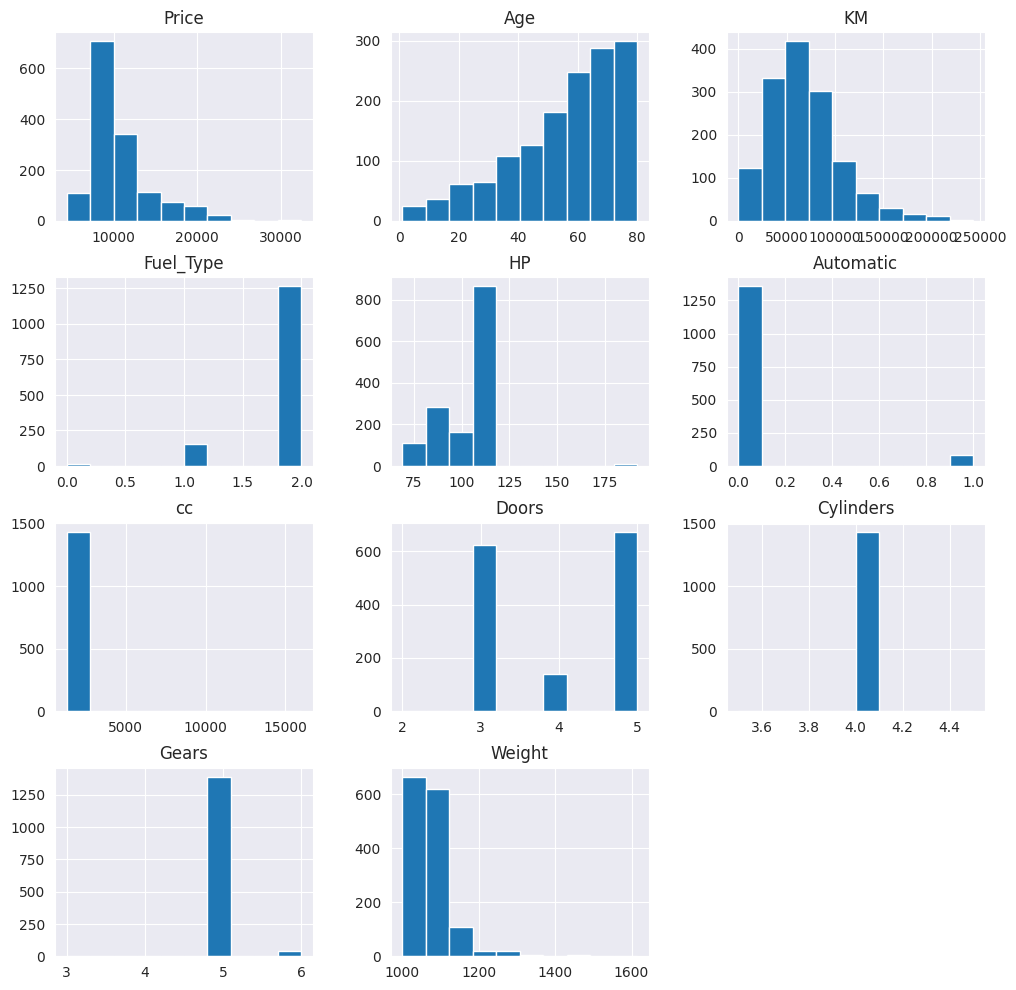

In [74]:
# Create a histogram for each numerical column
df.hist(figsize=(12, 12))
plt.show()

# Correlation Matrix

In [75]:
df.corr()#corelation

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


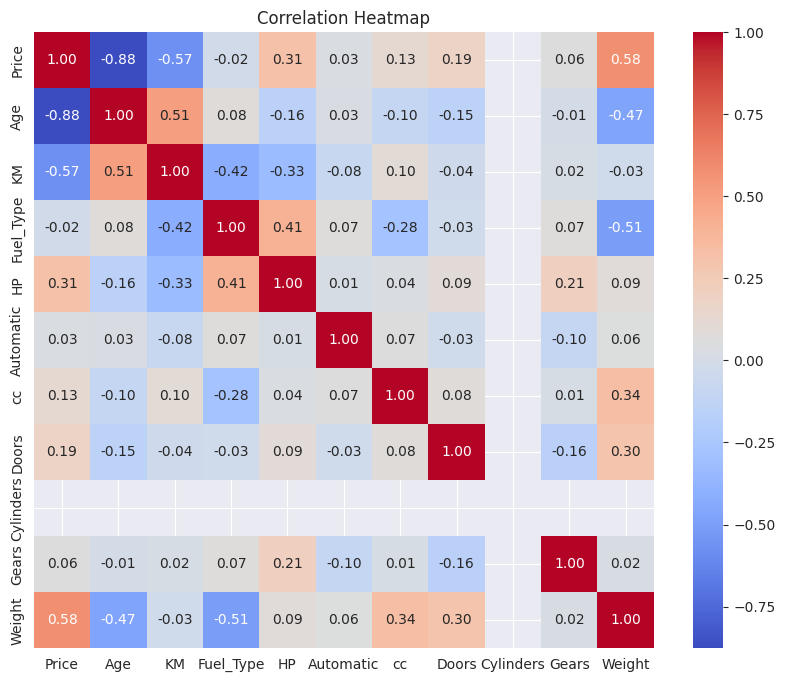

In [76]:
#  CORRELATION HEAT MAP
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# # Scatterplot between variables along with histograms


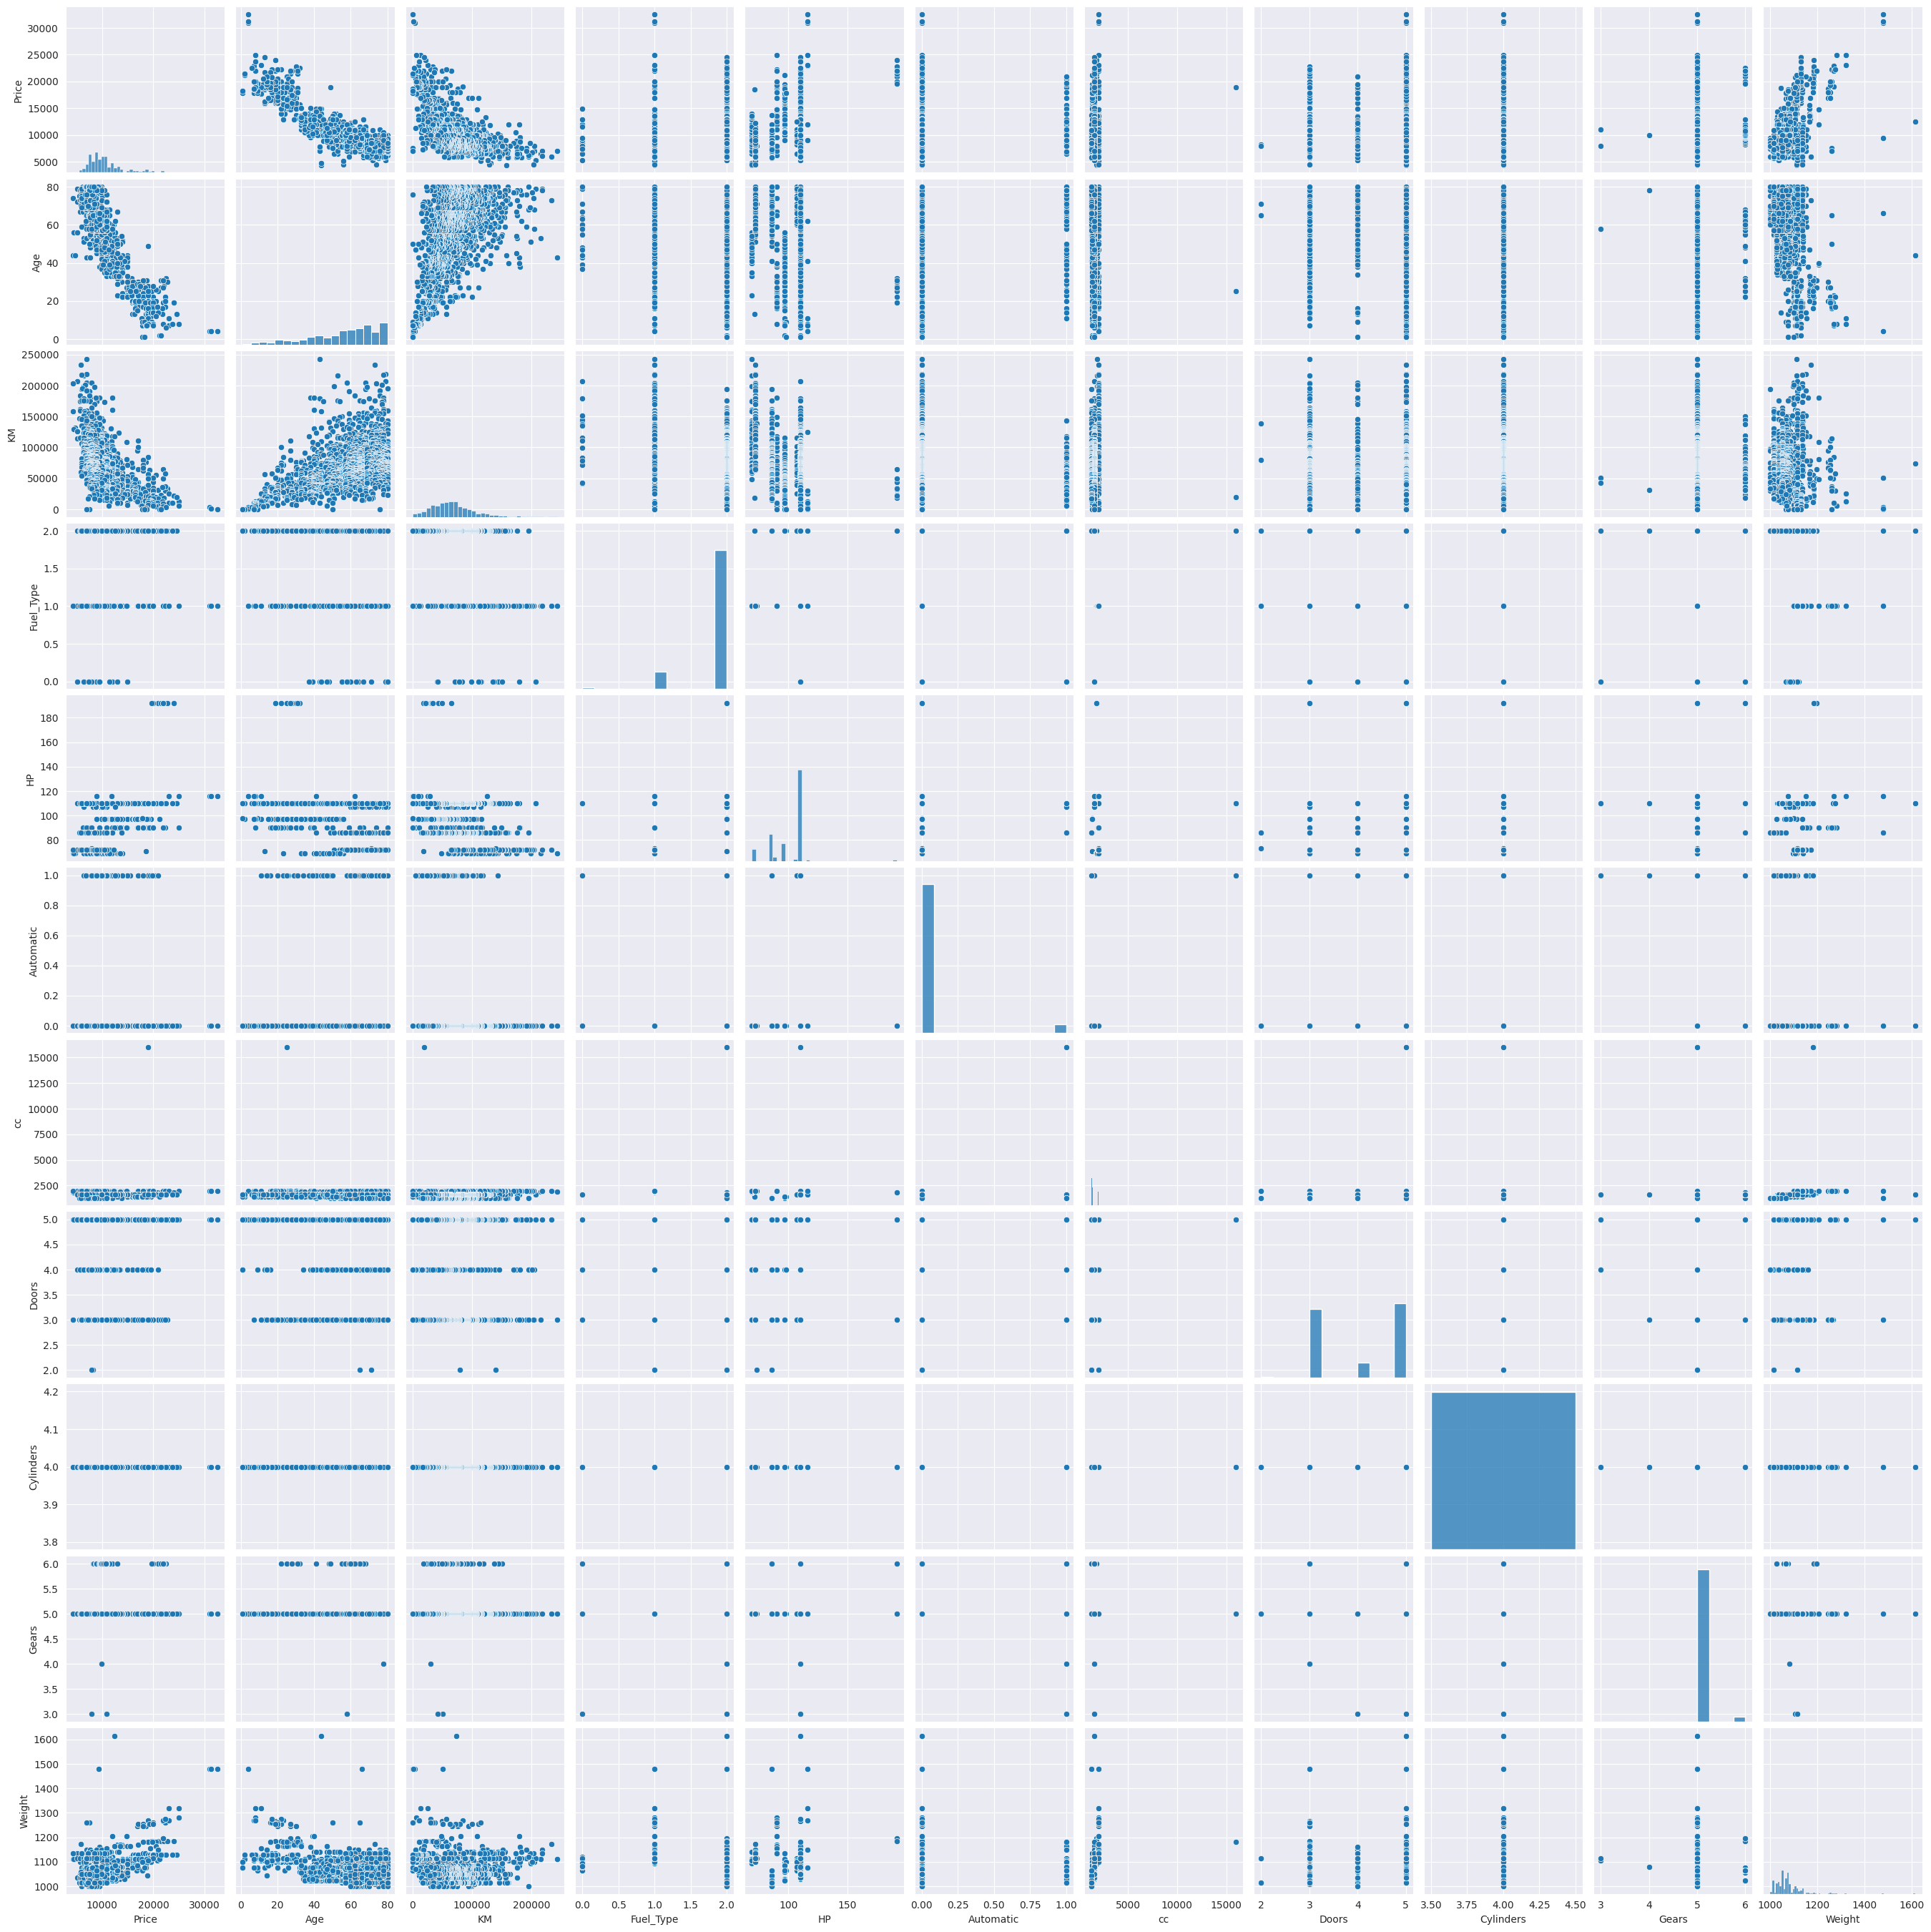

In [77]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)

In [78]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y). Replace 'Price' with your actual target column.
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 10)
X_test shape: (288, 10)
y_train shape: (1148,)
y_test shape: (288,)


In [79]:
#X_train  y=prise

print(X_train)
y_train


      Age      KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  Gears  \
899    62   59295          2   86          0  1300      5          4      5   
881    68   61568          2  110          0  1600      4          4      5   
310    40   38653          2  110          0  1600      5          4      5   
1145   75  101855          2  110          0  1600      5          4      5   
31     22   35199          2   97          0  1400      3          4      5   
...   ...     ...        ...  ...        ...   ...    ...        ...    ...   
1095   76  125778          2  110          0  1600      3          4      5   
1130   73  107108          2  110          0  1600      3          4      5   
1294   80   71740          2  110          0  1600      5          4      5   
860    63   64690          2   86          0  1300      3          4      5   
1126   80  110000          2  110          0  1600      4          4      5   

      Weight  
899     1035  
881     1035  
310   

,Price
899,9500
881,9795
310,12950
1145,6450
31,15750
...,...
1095,6900
1130,7950
1294,6950
860,9750


In [80]:
#y_test  x=rem col
print(y_train)
X_train

899      9500
881      9795
310     12950
1145     6450
31      15750
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1148, dtype: int64


,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
899,62,59295,2,86,0,1300,5,4,5,1035
881,68,61568,2,110,0,1600,4,4,5,1035
310,40,38653,2,110,0,1600,5,4,5,1080
1145,75,101855,2,110,0,1600,5,4,5,1070
31,22,35199,2,97,0,1400,3,4,5,1100
...,...,...,...,...,...,...,...,...,...,...
1095,76,125778,2,110,0,1600,3,4,5,1050
1130,73,107108,2,110,0,1600,3,4,5,1050
1294,80,71740,2,110,0,1600,5,4,5,1070
860,63,64690,2,86,0,1300,3,4,5,1020


# preparing a model

In [81]:
#y_train target variabl
#x-train independent variables
import statsmodels.formula.api as smf
# Fit the OLS model
model = smf.ols('y_train~ Age + KM + Fuel_Type + HP + Automatic + cc + Doors + Cylinders + Gears + Weight', data=X_train).fit()



In [82]:
#  X_train columns

X_train.columns

Index(['Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [83]:
y_train.shape

(1148,)

In [84]:
#Coefficients
model.params

,0
Intercept,-743.310477
Age,-121.436240
KM,-0.016936
Fuel_Type,862.056431
HP,20.658283
Automatic,245.196891
cc,-0.073515
Doors,-36.279648
Cylinders,-2973.241909
Gears,530.282040


In [85]:
# p-Values
print( model.pvalues)

Intercept     2.777336e-14
Age          2.560498e-234
KM            5.673010e-30
Fuel_Type     2.615766e-08
HP            5.076186e-11
Automatic     1.582229e-01
cc            4.102890e-01
Doors         4.107246e-01
Cylinders     2.777336e-14
Gears         1.031806e-02
Weight        1.409862e-75
dtype: float64


In [86]:
p_values_dict = model.pvalues.to_dict()
for col, p_value in p_values_dict.items():
    if p_value < 0.05:
        print(f"\033[97mVariable '{col}' is significant (p-value: {p_value:.3f})\033[0m")  # White color for significant
    else:
        print(f"\033[93mVariable '{col}' is insignificant (p-value: {p_value:.3f})\033[0m") # Yellow for insignificant

Variable 'Intercept' is significant (p-value: 0.000)
Variable 'Age' is significant (p-value: 0.000)
Variable 'KM' is significant (p-value: 0.000)
Variable 'Fuel_Type' is significant (p-value: 0.000)
Variable 'HP' is significant (p-value: 0.000)
Variable 'Automatic' is insignificant (p-value: 0.158)
Variable 'cc' is insignificant (p-value: 0.410)
Variable 'Doors' is insignificant (p-value: 0.411)
Variable 'Cylinders' is significant (p-value: 0.000)
Variable 'Gears' is significant (p-value: 0.010)
Variable 'Weight' is significant (p-value: 0.000)


In [87]:
# R squared value

print(model.rsquared, model.rsquared_adj)

0.8695032279244472 0.8684711796391397


## Simple Linear Regression Models

In [88]:
#FOR FUEL_TYPE VARIABLE
# checking for individual variables which are insignificent    #re-checking
model_F= smf.ols('y_train~ Fuel_Type', data=X_train).fit()
print(model_F.pvalues)



Intercept    2.584052e-83
Fuel_Type    7.155616e-01
dtype: float64


In [89]:
#FOR Automatic VARIABLE
# checking for individual variables which are insignificent    #re-checking
model_A= smf.ols('y_train~ Automatic', data=X_train).fit()
print(model_A.pvalues)

Intercept    0.000000
Automatic    0.255671
dtype: float64


In [90]:
#FOR Gears VARIABLE
# checking for individual variables which are insignificent    #re-checking
model_G= smf.ols('y_train~ Gears', data=X_train).fit()
print(model_G.pvalues)

Intercept    0.023653
Gears        0.088623
dtype: float64


In [91]:
# Now from model_A ,model_F,model_G  pvaluse <00.5 print significent else insignifint

p_values_dict = {
    'Fuel_Type': model_F.pvalues[1],
    'Automatic': model_A.pvalues[1],
    'Gears': model_G.pvalues[1]
}

for model_name, p_value in p_values_dict.items():
  if p_value < 0.05:
    print(f"Model {model_name}: Significant (p-value = {p_value:.3f})")
  else:
    print(f"Model {model_name}: Insignificant (p-value = {p_value:.3f})")


Model Fuel_Type: Insignificant (p-value = 0.716)
Model Automatic: Insignificant (p-value = 0.256)
Model Gears: Insignificant (p-value = 0.089)


In [92]:
#All 3 are insignificant there fore we need to drop them from the df
# if they are significant we need to check by adding them
# if they or equal there exist multi collinear problem
#to solve that problem we use VIF (variance influnce factor)

In [93]:
'''# Drop 'Gears', 'Automatic', and 'Fuel_Type' columns from X_train
X_train = X_train.drop(['Gears', 'Automatic', 'Fuel_Type'], axis=1)
X_train'''

"# Drop 'Gears', 'Automatic', and 'Fuel_Type' columns from X_train\nX_train = X_train.drop(['Gears', 'Automatic', 'Fuel_Type'], axis=1)\nX_train"

model_1

In [94]:
# Fit the OLS model
model_1 = smf.ols('y_train~ Age + KM + HP + cc + Doors + Cylinders  + Weight', data=X_train).fit()
print(model_1.pvalues)

Intercept     4.849272e-07
Age          4.557602e-229
KM            2.801231e-46
HP            8.214059e-24
cc            2.590009e-01
Doors         6.052072e-01
Cylinders     4.849272e-07
Weight        2.305598e-78
dtype: float64


In [95]:
# prompt: print pvalues >0.05 as in significent else significent in yellow and white colors

p_values_dict = model_1.pvalues.to_dict()
for col, p_value in p_values_dict.items():
    if p_value < 0.05:
        print(f"\033[97mVariable '{col}' is significant (p-value: {p_value:.3f})\033[0m")  # White color for significant
    else:
        print(f"\033[93mVariable '{col}' is insignificant (p-value: {p_value:.3f})\033[0m") # Yellow for insignificant

Variable 'Intercept' is significant (p-value: 0.000)
Variable 'Age' is significant (p-value: 0.000)
Variable 'KM' is significant (p-value: 0.000)
Variable 'HP' is significant (p-value: 0.000)
Variable 'cc' is insignificant (p-value: 0.259)
Variable 'Doors' is insignificant (p-value: 0.605)
Variable 'Cylinders' is significant (p-value: 0.000)
Variable 'Weight' is significant (p-value: 0.000)


In [96]:
#checking individually for cc
model_cc= smf.ols('y_train~ cc', data=X_train).fit()
print(model_cc.pvalues)

Intercept    1.026766e-107
cc            2.257596e-05
dtype: float64


In [97]:
#ind with doors
model_D= smf.ols('y_train~ Doors', data=X_train).fit()
print(model_D.pvalues)

Intercept    5.130827e-62
Doors        3.746179e-09
dtype: float64


model_2

In [98]:
# Fit the OLS model
model_2 = smf.ols('y_train~ cc + Doors', data=X_train).fit()# giving insignificent value
print(model_2.pvalues)

Intercept    2.564204e-32
cc           9.718827e-05
Doors        1.566827e-08
dtype: float64


# Calculating VIF


In [99]:
# Import necessary libraries (already imported in your code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your dataframe with independent variables
# and it has already been preprocessed

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF values
print(vif)

# Get the R-squared value from the model
print(model_1.rsquared, model_1.rsquared_adj)

    Variable          VIF
0        Age     1.950751
1         KM     1.979201
2  Fuel_Type     2.395977
3         HP     1.422820
4  Automatic     1.072764
5         cc     1.153476
6      Doors     1.175308
7  Cylinders  1790.041389
8      Gears     1.114797
9     Weight     2.416173
0.8644640192107063 0.8637512971381947



# Residual Analysis




## Test for Normality of Residuals (Q-Q Plot)

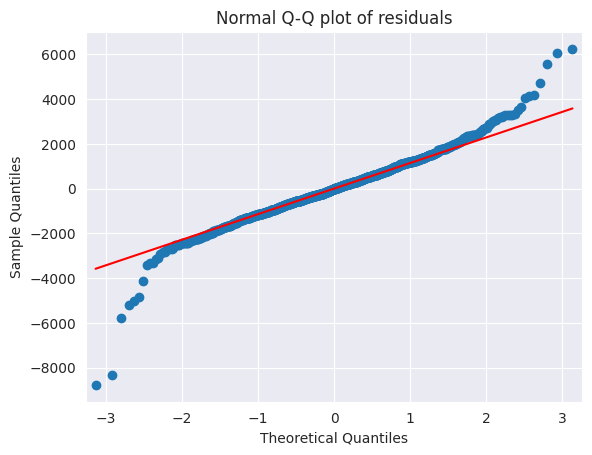

In [100]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [101]:
list(np.where(model.resid>6000))

[array([93])]

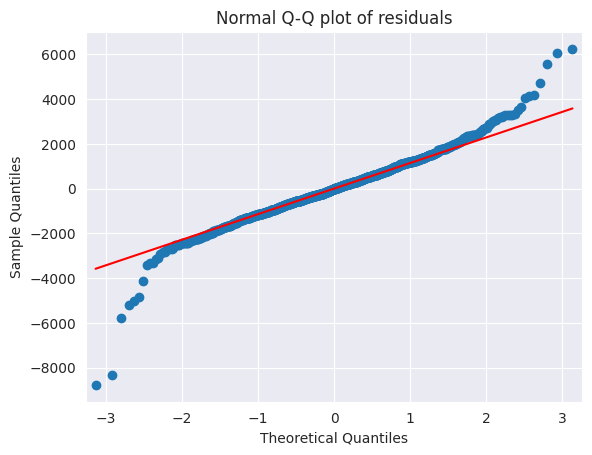

Indices of potential outliers: [  26   54   56   69   93  127  163  229  256  273  286  288  290  312
  340  345  346  366  371  417  449  453  458  462  469  503  537  549
  669  673  681  691  758  778  788  831  845  858  866  893  935  939
 1000 1025 1053 1075 1089 1112]

Indices of outliers above 95th percentile: [  26   54   93  163  181  209  229  233  238  288  290  332  340  345
  346  366  371  380  425  426  439  449  453  458  460  469  479  503
  507  532  549  550  615  620  681  696  702  712  758  777  778  805
  817  827  831  845  858  883  885  893  903  904  934 1000 1052 1053
 1075 1089]


In [102]:
# Identify outliers in the Q-Q plot
# Assuming 'model_1' is your fitted model

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Create the Q-Q plot
qqplot = sm.qqplot(model_1.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Find outliers visually or using a threshold (e.g., residuals > 2 standard deviations)
residuals = model_1.resid
std_dev = np.std(residuals)
outlier_threshold = 2 * std_dev  # Adjust this threshold as needed
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)

print("Indices of potential outliers:", outlier_indices[0])

# Alternatively, use a quantile-based threshold
# to identify outliers beyond a specific percentile.
upper_quantile = np.quantile(residuals, 0.95) # Example: 95th percentile
outlier_indices_quantile = np.where(residuals > upper_quantile)
print("\nIndices of outliers above 95th percentile:", outlier_indices_quantile[0])

### Residual Plot for Homoscedasticity

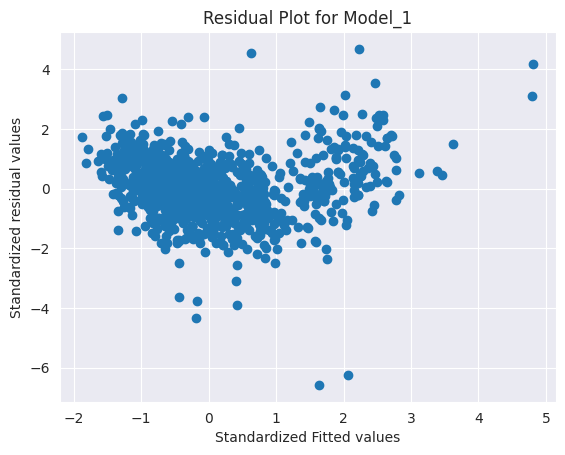

In [103]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot for Model_1')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

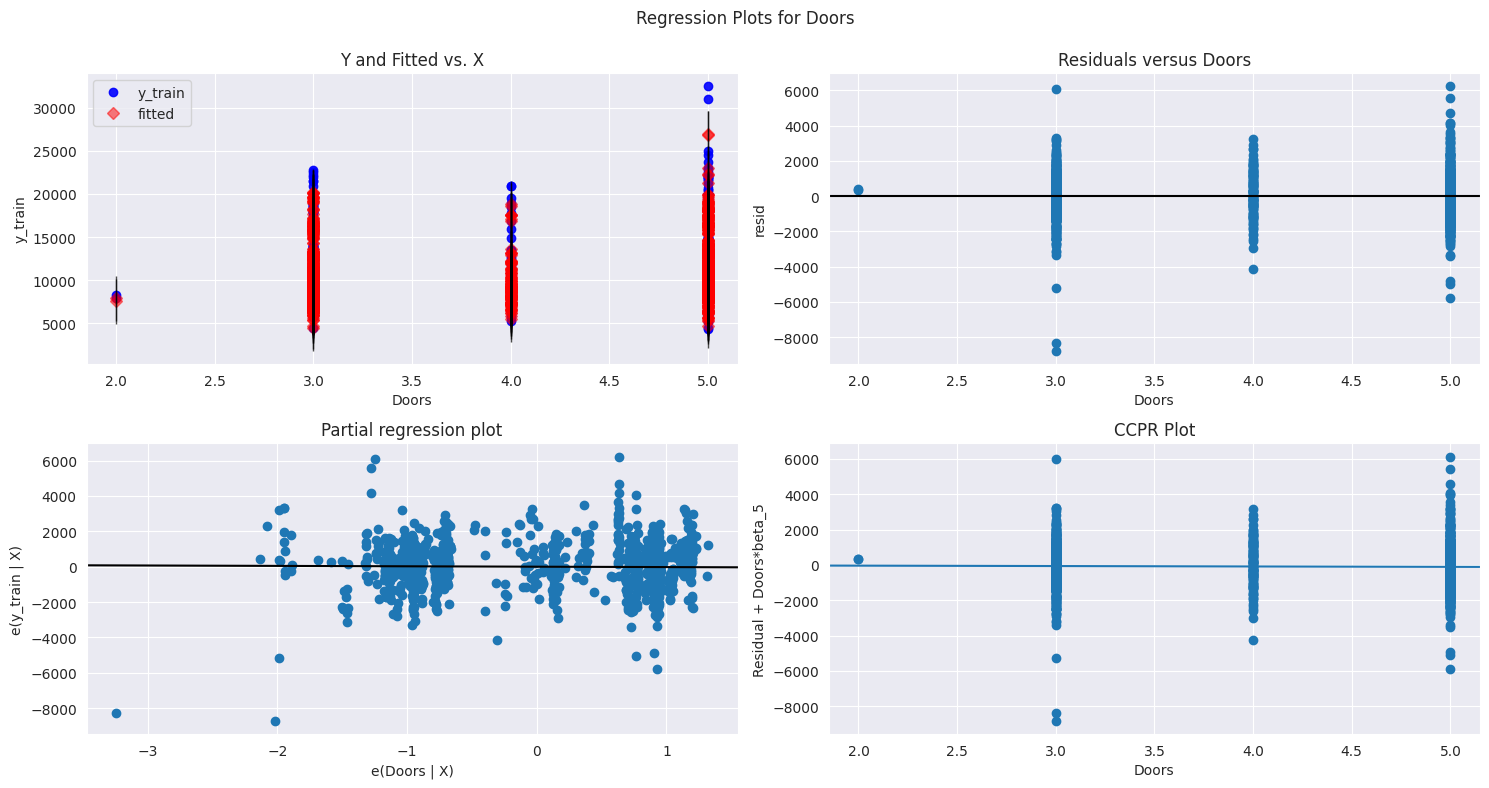

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Doors", fig=fig)
plt.show()

In [105]:
X_train.columns

Index(['Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

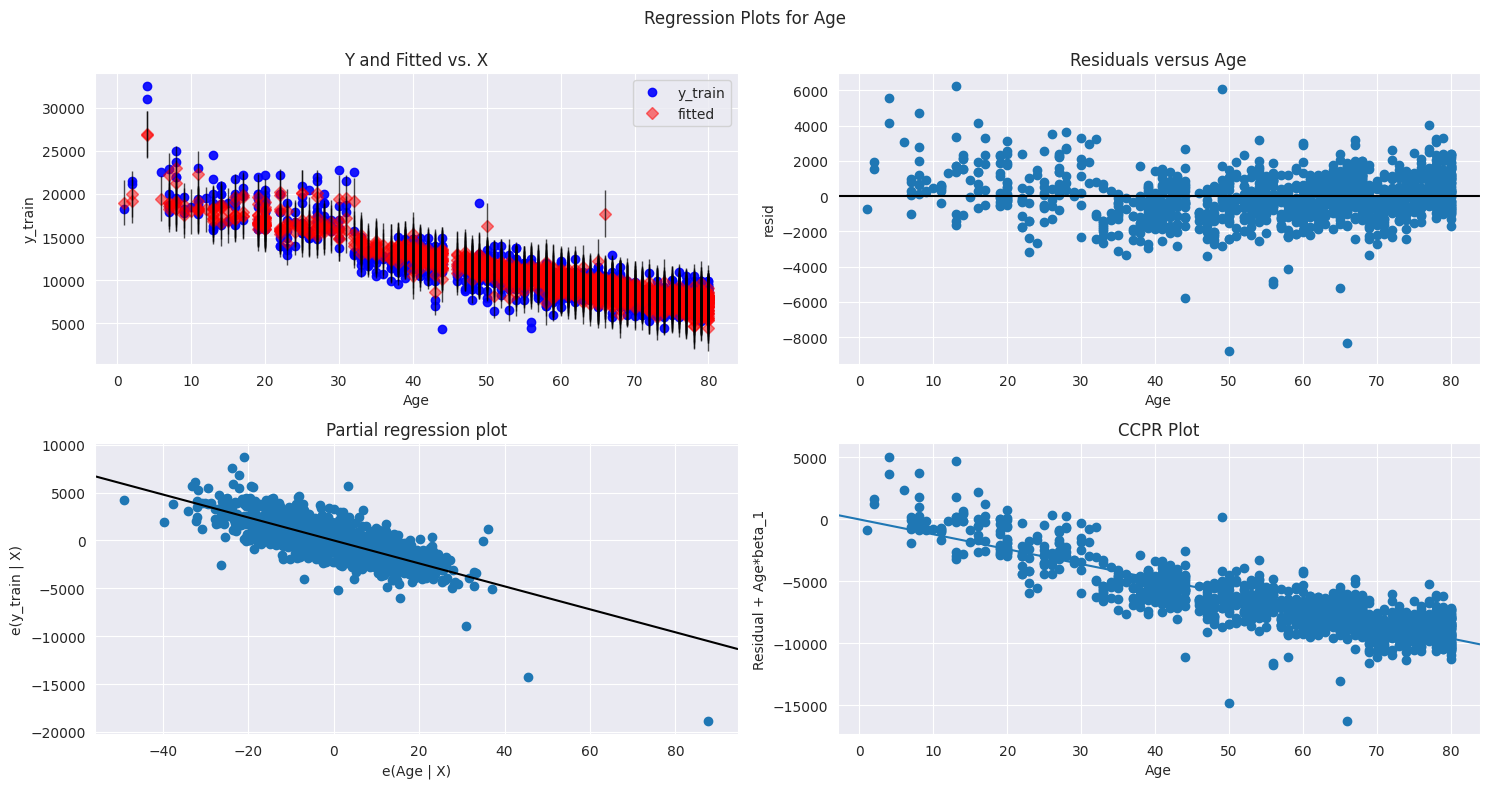

In [106]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Age", fig=fig)
plt.show()

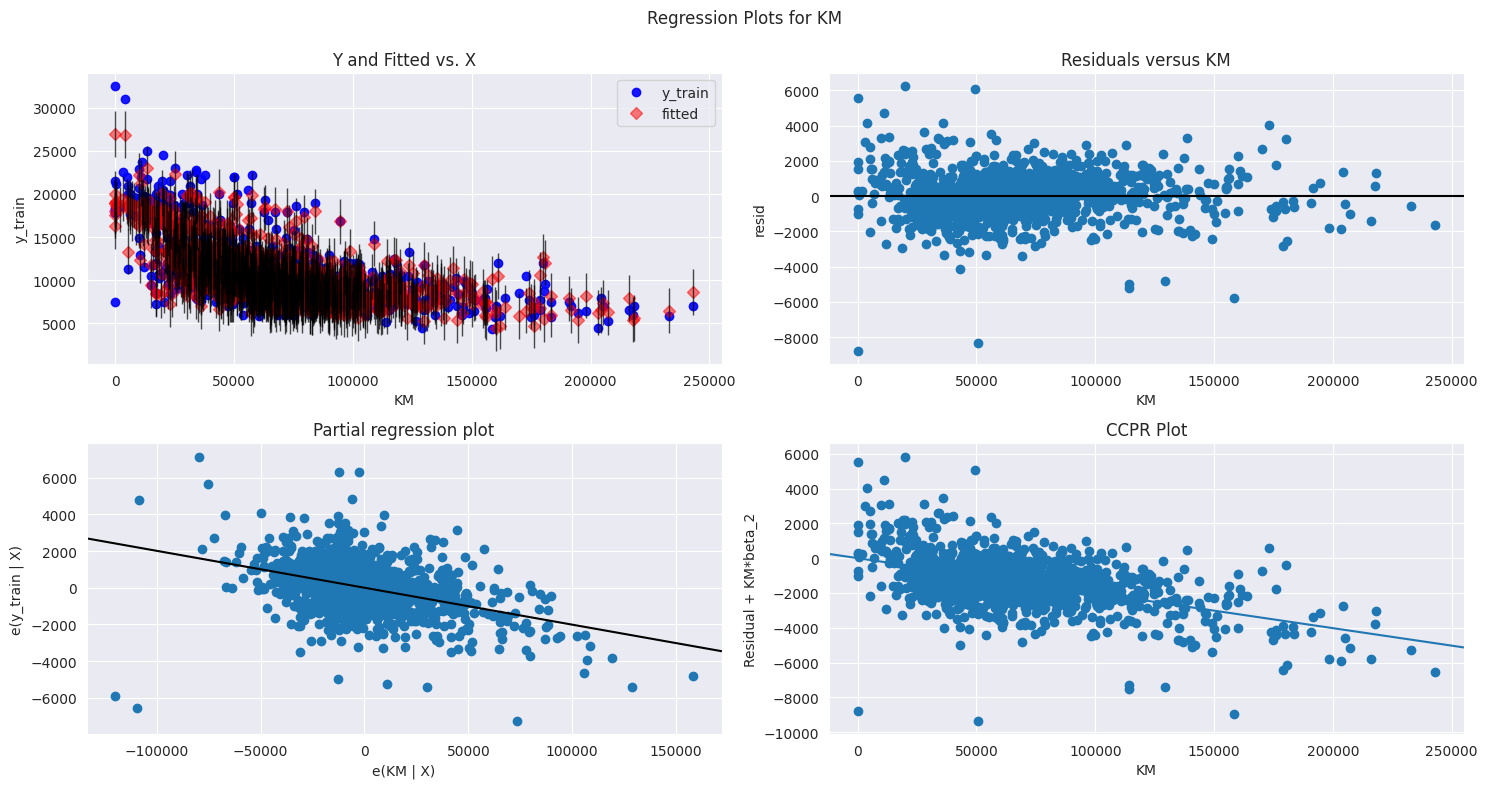

In [107]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "KM", fig=fig)
plt.show()

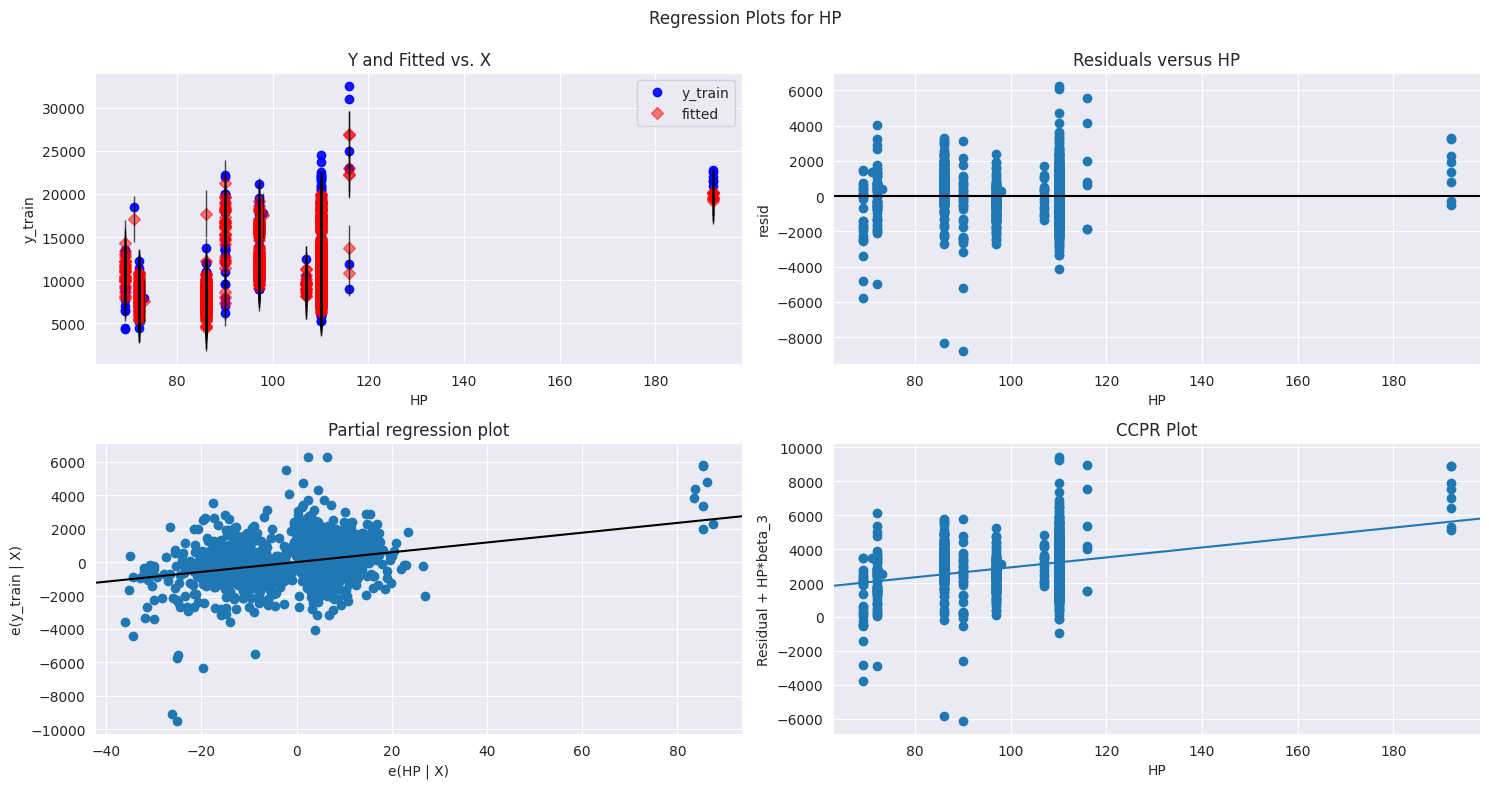

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "HP", fig=fig)
plt.show()

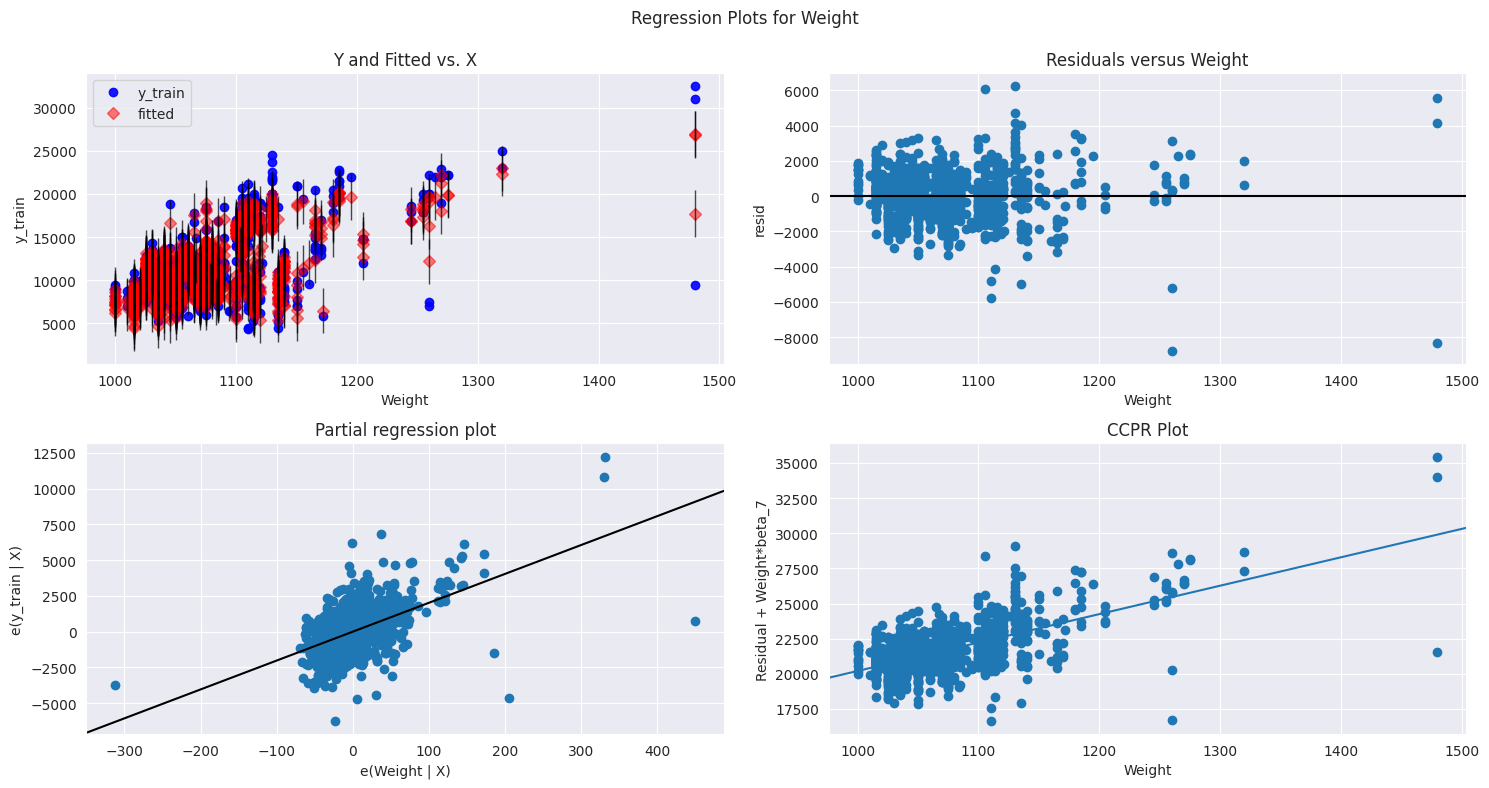

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostics

## Cook’s Distance

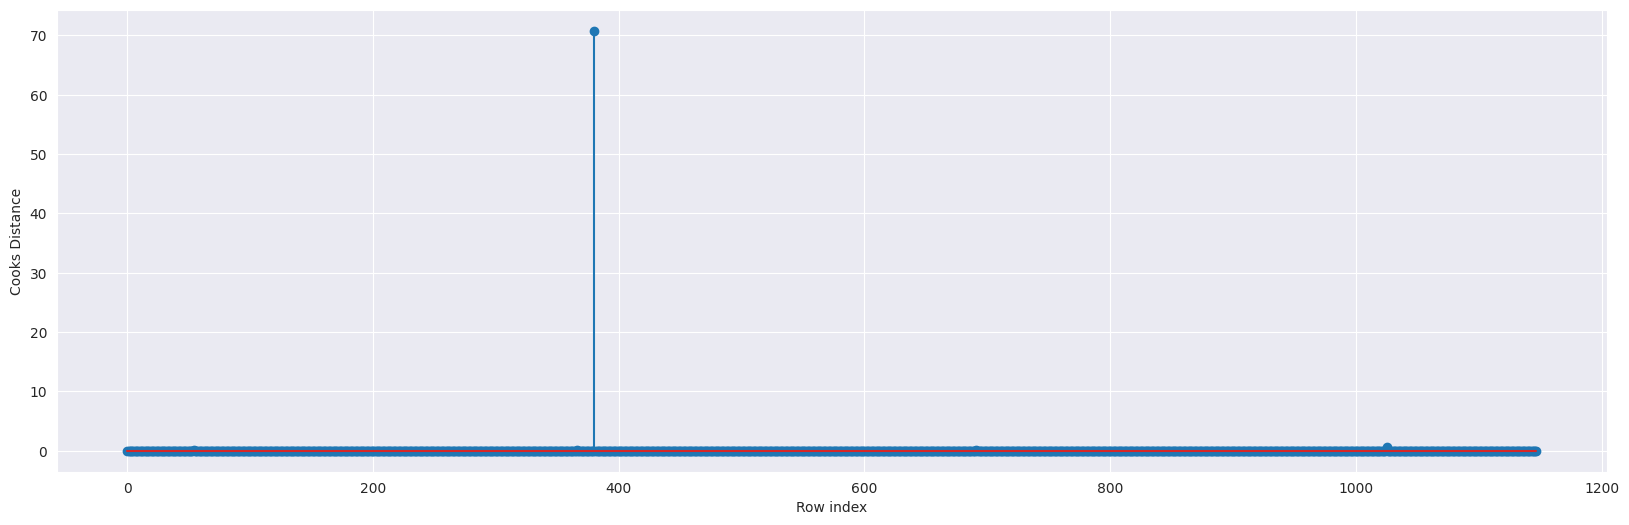

In [110]:
# prompt: model_influence = model.get_influence()
# (c, _) = model_influence.cooks_distance          Plot the influencers values using stem plot
# fig = plt.subplots(figsize=(20, 7))
# plt.stem(np.arange(len(cars)), np.round(c, 3))
# plt.xlabel('Row index')
# plt.ylabel('Cooks Distance')
# plt.show() do for our model_1

import matplotlib.pyplot as plt
import numpy as np

model_influence = model_1.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(20, 6))
plt.stem(np.arange(len(X_train)), np.round(c, 1))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [111]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))#max value

(380, 70.78777422160476)

### High Influence points

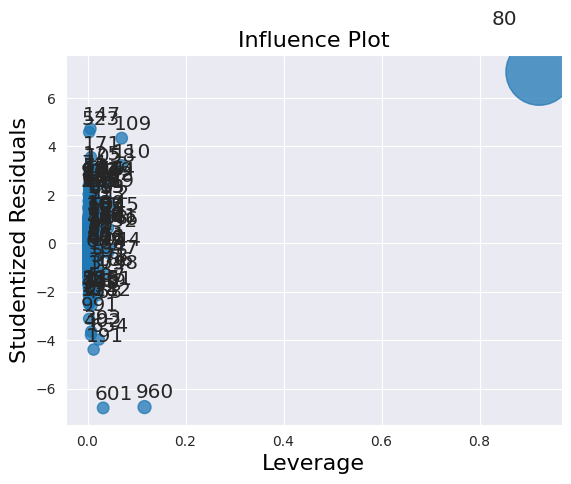

In [112]:
# influence_plot(model)
# plt.show()
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_1)
plt.show()

In [113]:
# leverage_cutoff
k = 6
n = X_train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.01829268292682927

From the above plot, it is evident that data poit 380 influencers

In [114]:
X_train[X_train.index.isin([380,70])]

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [115]:
X_train.head()

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
899,62,59295,2,86,0,1300,5,4,5,1035
881,68,61568,2,110,0,1600,4,4,5,1035
310,40,38653,2,110,0,1600,5,4,5,1080
1145,75,101855,2,110,0,1600,5,4,5,1070
31,22,35199,2,97,0,1400,3,4,5,1100


In [116]:
#improving model follows and again repait the avtivity

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.


In [117]:
# Model 3 (Example: Removing 'cc' based on previous analysis)
model_3 = smf.ols('y_train ~ Age + KM + HP + Doors + Cylinders + Weight', data=X_train).fit()
print(model_3.summary())

# Interpretation of Coefficients for Model 3
print("\nInterpretation of Coefficients for Model 3:")
for col, coef in model_3.params.items():
    if col != 'Intercept':
        print(f"- A one-unit increase in '{col}' is associated with a {coef:.2f} change in 'Price', holding other variables constant.")


#Further model improvements and diagnostics can be performed as needed, following the same pattern.

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1455.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:57:11   Log-Likelihood:                -9888.9
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1142   BIC:                         1.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -314.5250     63.659     -4.941      0.0

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'model_1' (or any other final model) is your best performing model
# Make predictions on the test set
y_pred = model_1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1993231.2949046332
Root Mean Squared Error (RMSE): 1411.8184355307992
R-squared (R2): 0.8506135922367157


5.Apply Lasso and Ridge methods on the model.

In [119]:
# Apply Lasso regularization
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)

# Print Lasso coefficients
print("Lasso Coefficients:", lasso.coef_)

# Print Lasso intercept
print("Lasso Intercept:", lasso.intercept_)

# Print Lasso predictions
print("Lasso Predictions:", lasso_pred)

Lasso Coefficients: [-1.21372123e+02 -1.69928764e-02  8.49605132e+02  2.08317267e+01
  2.24725572e+02 -7.32847182e-02 -3.58991409e+01  0.00000000e+00
  5.01974246e+02  2.34718712e+01]
Lasso Intercept: -12447.162445129998
Lasso Predictions: [ 9039.40416284  8786.42178539 13594.56804237 ...  7942.72112556
  8546.07568656  6506.95732622]


In [120]:
# Apply Ridge regularization
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_train)

# Print Ridge coefficients
print("Ridge Coefficients:", ridge.coef_)

# Print Ridge intercept
print("Ridge Intercept:", ridge.intercept_)

# Print Ridge predictions
print("Ridge Predictions:", ridge_pred)

Ridge Coefficients: [-1.21416308e+02 -1.69724308e-02  8.51619534e+02  2.07801481e+01
  2.41303341e+02 -7.38416938e-02 -3.63199959e+01  0.00000000e+00
  5.18174870e+02  2.34721914e+01]
Ridge Intercept: -12524.78075459272
Ridge Predictions: [ 9038.35794165  8784.17279862 13592.68129896 ...  7939.74023761
  8545.93248976  6505.16833206]


# INTERVIEW QUESTIONS

1.What is Normalization &Standardization and how is it helpful?

In [121]:
"""# Normalization:
# Normalization scales data to a specific range, typically between 0 and 1.
# It's useful when the data's distribution isn't important, but the relative values within a feature are.
# Example: Image processing, where pixel values need to be between 0 and 255.
# Formula: x_normalized = (x - x_min) / (x_max - x_min)

# Standardization (Z-score normalization):
# Standardization transforms data to have a mean of 0 and a standard deviation of 1.
# It's preferred when the data's distribution matters (e.g., many machine learning algorithms assume normally distributed data). Outliers can significantly impact the mean and standard deviation.
# Formula: x_standardized = (x - mean) / standard_deviation


# Helpfulness:
# 1. Improved Model Performance: Many machine learning algorithms are sensitive to feature scaling. Normalization and standardization can prevent features with larger values from dominating the learning process.
# 2. Faster Convergence: Algorithms like gradient descent can converge faster with normalized/standardized data.
# 3. Better Interpretation: Some models provide coefficients that are easier to interpret when features are on a similar scale.
# 4. Enhanced Distance Calculations: Distance-based algorithms (e.g., KNN, K-means) benefit from feature scaling, preventing features with larger ranges from skewing the distances.
"""


"# Normalization:\n# Normalization scales data to a specific range, typically between 0 and 1.  \n# It's useful when the data's distribution isn't important, but the relative values within a feature are.  \n# Example: Image processing, where pixel values need to be between 0 and 255.\n# Formula: x_normalized = (x - x_min) / (x_max - x_min)\n\n# Standardization (Z-score normalization):\n# Standardization transforms data to have a mean of 0 and a standard deviation of 1.\n# It's preferred when the data's distribution matters (e.g., many machine learning algorithms assume normally distributed data). Outliers can significantly impact the mean and standard deviation.\n# Formula: x_standardized = (x - mean) / standard_deviation\n\n\n# Helpfulness:\n# 1. Improved Model Performance: Many machine learning algorithms are sensitive to feature scaling. Normalization and standardization can prevent features with larger values from dominating the learning process.\n# 2. Faster Convergence: Algorithm

2.What techniques can be used to address multicollinearity in multiple linear regression?

In [122]:
'''# Techniques to address multicollinearity:

# 1. Remove one or more of the correlated variables:  If two or more variables are highly correlated, remove one of them from the model.  Choose the variable that is less theoretically important or has a higher p-value.  This is often the simplest and most effective approach.  You've already demonstrated this by removing 'Gears', 'Automatic', and 'Fuel_Type' in your code.

# 2. Combine the correlated variables: Create a new variable that is a combination of the correlated variables (e.g., principal component analysis, averaging, or creating interaction terms).  This reduces the number of predictors and can help improve model stability.

# 3. Regularization techniques: Lasso (L1) or Ridge (L2) regularization add penalties to the regression coefficients.  Lasso can shrink the coefficients of correlated variables to zero, effectively removing them from the model. Ridge shrinks coefficients towards zero but rarely eliminates them completely. You've already implemented Lasso and Ridge in your code.

# 4. Principal Component Analysis (PCA):  PCA creates new uncorrelated variables (principal components) from the original correlated variables.  These components are linear combinations of the original features.  Use the principal components as predictors in your regression model.  PCA can be more complex but is helpful when you have many highly correlated variables.  Note that the interpretation of coefficients may become less straightforward.

# 5. Variance Inflation Factor (VIF):  As you have calculated, VIF measures the extent to which the variance of an estimated regression coefficient is increased because of collinearity.  Focus on variables with high VIF values and consider the methods listed above to address them.

# 6. Collect more data: Increasing the sample size can sometimes alleviate multicollinearity, as it provides more information to the model and allows for more accurate estimation of the coefficients.'''

"# Techniques to address multicollinearity:\n\n# 1. Remove one or more of the correlated variables:  If two or more variables are highly correlated, remove one of them from the model.  Choose the variable that is less theoretically important or has a higher p-value.  This is often the simplest and most effective approach.  You've already demonstrated this by removing 'Gears', 'Automatic', and 'Fuel_Type' in your code.\n\n# 2. Combine the correlated variables: Create a new variable that is a combination of the correlated variables (e.g., principal component analysis, averaging, or creating interaction terms).  This reduces the number of predictors and can help improve model stability.\n\n# 3. Regularization techniques: Lasso (L1) or Ridge (L2) regularization add penalties to the regression coefficients.  Lasso can shrink the coefficients of correlated variables to zero, effectively removing them from the model. Ridge shrinks coefficients towards zero but rarely eliminates them completel